# Pymaceuticals Inc.
---

### Analysis

- Summary: The study consisted of 249 subjects treated with one of 10 potential drug regimens. Tumor volume was measured over time to determine efficiency of the treatment (i.e. the smaller the tumor, the better). The following are some observations made from this data:
    - Ramicane and Capomulin were the most effective treatments, as the only regimens that resulted in mean Tumor Volume below 50 mm3 (40.2 and 40.7 respectively). The remaining regimens were all within the 52 mm3 to 56 mm3 range. Ramicane and Capomulin were also the most observed regimens, but any correlation would need to be further examined.
    - The Capomulin treatment showed reduction in tumor volume through the 40 Timepoint, but at 45 showed a reversal in the trend. Further measurements at larger timepoints would allow a determination as to whether this was an aberration or a pattern.
    - The correlation coefficient of mouse weight vs. tumor volume is 0.53, which would indicate a moderate correlation between the values. Further calculations for sex or age might indicate stronger correlations.

### References
- Quartile, correlation and regression formulas and structure were taken from in-class materials provided by the instructor. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
summary_df = study_results.merge(mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
summary_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
print(summary_df['Mouse ID'].nunique())

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df = summary_df[summary_df.duplicated(['Mouse ID', 'Timepoint']) == True]
duplicate_ids = duplicates_df['Mouse ID'].unique()
duplicate_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = summary_df[summary_df['Mouse ID'] != duplicate_ids[0]]
clean_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
print(clean_data_df['Mouse ID'].nunique())

248


## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
column_values=[]
column_names=[]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_value = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
column_values.append(mean_tumor_value)
column_names.append('Mean Tumor Volume')
median_tumor_value = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
column_values.append(median_tumor_value)
column_names.append('Median Tumor Volume')
var_tumor_value = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
column_values.append(var_tumor_value)
column_names.append('Tumor Volume Variance')
std_tumor_value = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
column_values.append(std_tumor_value)
column_names.append('Tumor Volume Std. Dev.')
sem_tumor_value = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
column_values.append(sem_tumor_value)
column_names.append('Tumor Volume Std. Err.')

summary_stats_df = pd.concat(column_values, keys=column_names, axis=1)
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: title={'center': 'Observations per Regimen'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

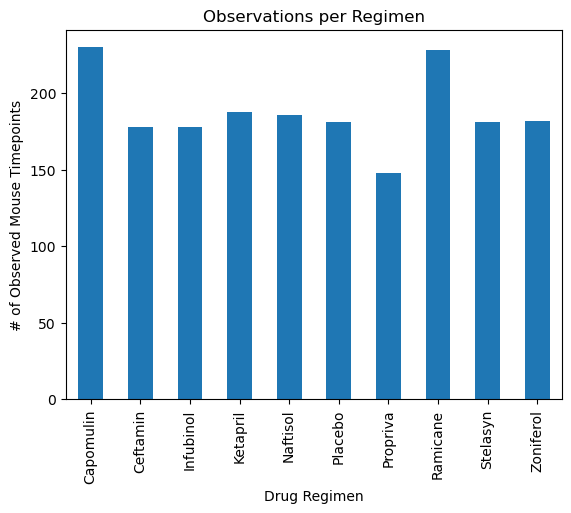

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
xvalues = clean_data_df['Drug Regimen'].unique()
yvalues = clean_data_df.groupby('Drug Regimen')[['Mouse ID', 'Timepoint']].count()

yvalues['Mouse ID'].plot(kind="bar", xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints', title='Observations per Regimen')

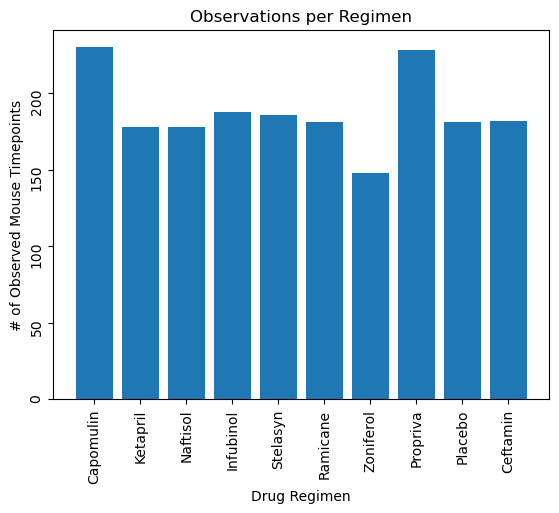

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
fig, ax = plt.subplots()

ax.bar(xvalues, yvalues['Mouse ID'])

ax.set_ylabel('# of Observed Mouse Timepoints')
ax.set_xlabel('Drug Regimen')
ax.tick_params(which='major', labelrotation=90)
plt.title('Observations per Regimen')
plt.show()

<Axes: title={'center': 'Population Distribution by Gender'}, ylabel='Sex'>

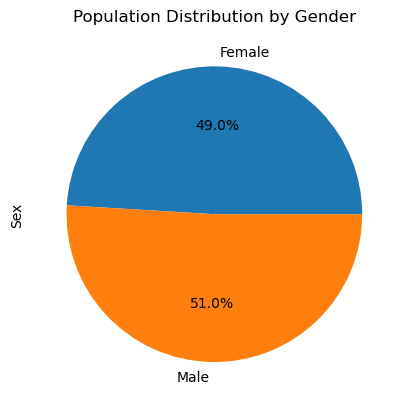

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
results = clean_data_df.groupby('Sex')['Mouse ID'].count()

results.plot.pie(y=results, autopct='%1.1f%%', ylabel="Sex", title='Population Distribution by Gender')

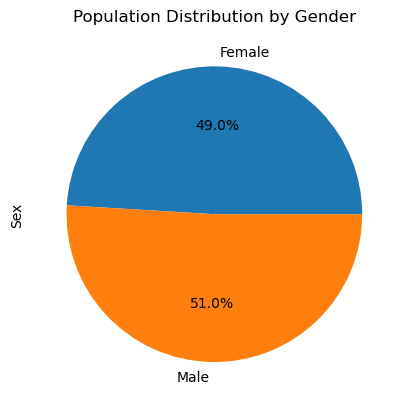

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig, ax = plt.subplots()

ax.pie(results, labels=['Female', 'Male'], autopct='%1.1f%%')
ax.set_ylabel('Sex')
plt.title('Population Distribution by Gender')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time = clean_data_df.groupby('Mouse ID')['Timepoint'].max()
max_time.columns = ['Mouse ID', 'Max Time']
max_df = max_time.to_frame()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_max_df = max_df.merge(clean_data_df, how='left', on=['Timepoint'])
mouse_max_df.head()

,Timepoint,Mouse ID,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,45,n364,31.095335,1,Ramicane,Male,4,17
1,45,b128,38.982878,2,Capomulin,Female,9,22
2,45,l661,59.851956,3,Ceftamin,Male,18,26
3,45,y865,64.729837,3,Ceftamin,Male,23,26
4,45,y769,68.594745,4,Ceftamin,Female,6,27


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
vol_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    drug_vols = mouse_max_df[mouse_max_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    #add subset 
    vol_data.append(drug_vols)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = mouse_max_df['Tumor Volume (mm3)'].quantile([.25, .5, .75])
quart_25 = quartiles[0.25]
quart_75 = quartiles[0.75]
iqr = quart_75 - quart_25
print(f"Lower quartile: {quart_25}")
print(f"Upper quartile: {quart_75}")
print(f"IQR: {iqr}")

lower_bound = quart_25 - (1.5*iqr)
upper_bound = quart_75 + (1.5*iqr)

# Determine outliers using upper and lower bounds
volume_outliers = mouse_max_df.loc[(mouse_max_df['Tumor Volume (mm3)'] < lower_bound) | (mouse_max_df['Tumor Volume (mm3)'] > upper_bound)]
print(f"Sample has " + str(volume_outliers['Mouse ID'].count()) + " outliers.")

Lower quartile: 45.0
Upper quartile: 63.42369517
IQR: 18.423695170000002
Sample has 0 outliers.


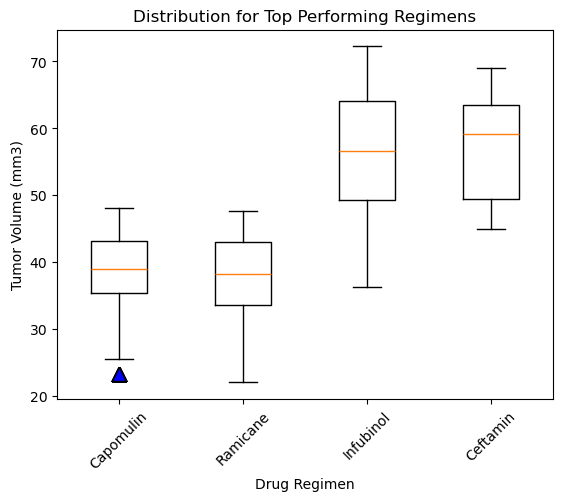

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(vol_data, flierprops={'marker': '^', 'markersize': 10, 'markerfacecolor': 'blue'})
ax.set_xticklabels(treatments, rotation=45, )
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
plt.title('Distribution for Top Performing Regimens')
plt.show()

## Line and Scatter Plots

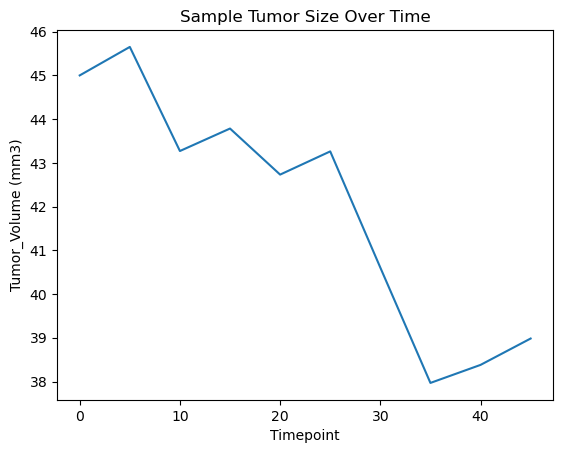

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#Get mouse info
mouse_data = clean_data_df[clean_data_df['Drug Regimen'] == 'Capomulin'].groupby('Drug Regimen').first()
mouse_id = mouse_data['Mouse ID'].iloc[0]

#get all rows for mouse
time_data = clean_data_df[clean_data_df['Mouse ID'] == mouse_id]

#create line plot
fig, ax = plt.subplots()

ax.plot(time_data['Timepoint'], time_data['Tumor Volume (mm3)'])
ax.set_xlabel('Timepoint')
ax.set_ylabel('Tumor_Volume (mm3)')
plt.title('Sample Tumor Size Over Time')
plt.show()

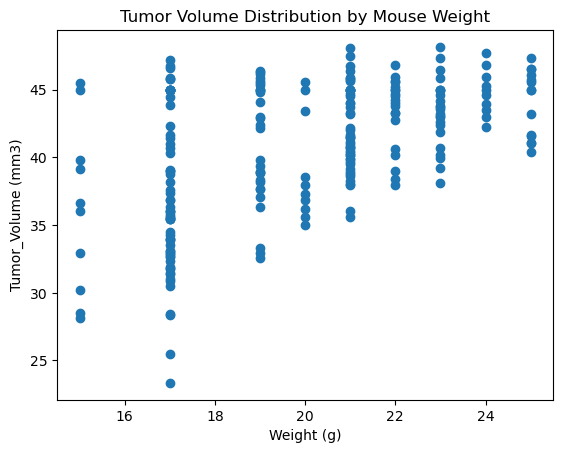

In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#Get population info
weight_data = clean_data_df[clean_data_df['Drug Regimen'] == 'Capomulin']

fig, ax = plt.subplots()

ax.scatter(weight_data['Weight (g)'], weight_data['Tumor Volume (mm3)'])
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Tumor_Volume (mm3)')
plt.title('Tumor Volume Distribution by Mouse Weight')
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr_coeff = st.pearsonr(weight_data['Weight (g)'], weight_data['Tumor Volume (mm3)'])
print(f"The correlation is {corr_coeff}")

The correlation is PearsonRResult(statistic=0.525699555207717, pvalue=9.60544662950128e-18)


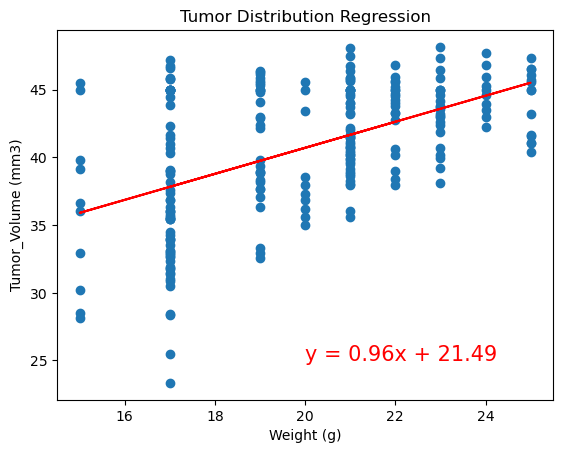

In [27]:
#Calculate and display linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight_data['Weight (g)'], weight_data['Tumor Volume (mm3)'])
regress_values = weight_data['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig, ax = plt.subplots()

ax.scatter(weight_data['Weight (g)'], weight_data['Tumor Volume (mm3)'])
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Tumor_Volume (mm3)')
ax.plot(weight_data['Weight (g)'], regress_values, 'r-')
plt.annotate(line_eq,(20, 25),fontsize=15,color="red")
plt.title('Tumor Distribution Regression')
plt.show()
